# Machine Learning Model to predict the Global Intensity 

# 1. Data Loading

In [1]:
# Importing all packages

import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # this is used for the plot the graph 

In [2]:
%%time
# Importing Dataset

df= pd.read_csv("C:\\Users\\Rajashree\\Desktop\\householdpowerconsumption\\hpc_breakdowns.csv",parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(10)

Wall time: 7.95 s


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


# 2. Data Analysis

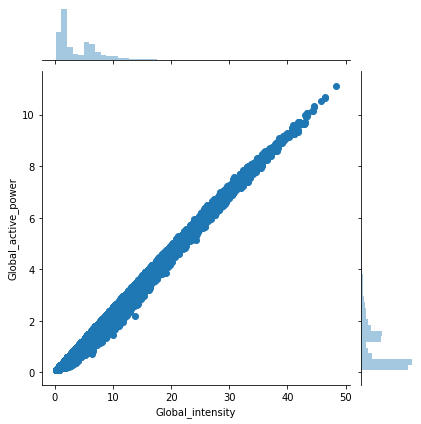

In [3]:
# The correlations between 'Global_intensity', 'Global_active_power'

import seaborn as sns
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

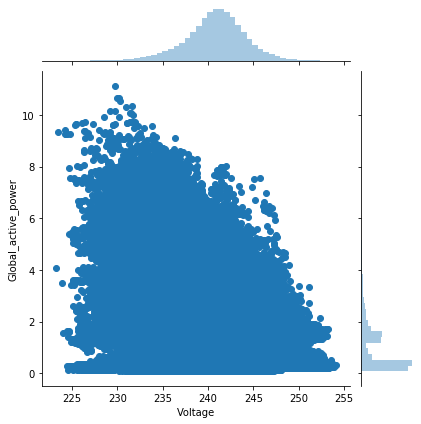

In [4]:
## The correlations between 'Voltage' and  'Global_active_power'

sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()

### From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

(8, 0)

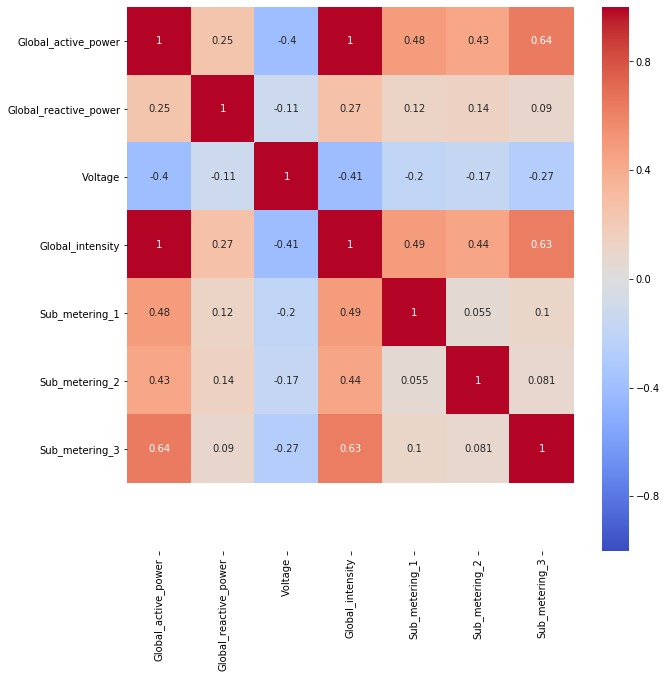

In [5]:
# Calculate correlations among Columns

plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
ax.set_ylim(8, 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
dt                       datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


In [7]:
df.dtypes

dt                       datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [8]:
df.shape

(2049280, 8)

In [9]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
df.isnull().sum().sort_values()

dt                          0
Sub_metering_3            129
Global_reactive_power     477
Sub_metering_2           1210
Sub_metering_1           1297
Global_intensity         2001
Voltage                  2031
Global_active_power      2043
dtype: int64

In [12]:
# List Unique values

for j in range(0,8):
       print(df.iloc[:, j].unique())

['2006-12-16T17:24:00.000000000' '2006-12-16T17:25:00.000000000'
 '2006-12-16T17:26:00.000000000' ... '2010-11-26T21:00:00.000000000'
 '2010-11-26T21:01:00.000000000' '2010-11-26T21:02:00.000000000']
[4.216 5.36  5.374 ... 3.626 4.214 3.124]
[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 

## 3. Data Cleaning

In [13]:
# Finding all columns that have nan (Dealing with missing values)

droping_list_all=[]
for j in range(0,8):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all

[1, 2, 3, 4, 5, 6, 7]

In [14]:
# Filling nan with mean in any columns

for j in range(0,8):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

## 4. Data Transformation

In [15]:
# Check Duplicates
df["is_duplicate"]= df.duplicated()
df.shape

(2049280, 9)

In [16]:
# Remove Duplicates 
df = df.drop_duplicates(subset=None,keep="first") # Dropping duplicate rows
df=df.drop(['is_duplicate'],axis=1)  # Dropping created 'is_duplicate' column 
df.shape

(2049280, 8)

In [17]:
# check to make sure that there are not more any 'nan'
df.isnull().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [18]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,1.056763e+00,1.127109e-01,3.237233e+00,4.442524e+00,6.152031e+00,5.821653e+00,8.436885e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.040000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428800e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [19]:
# Grab the last 200000 rows and assign it to seperate dataframe
validdata = df.tail(200000)
validdata

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,2010-07-02 07:58:00,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,2010-07-02 07:59:00,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,2010-07-02 08:00:00,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,2010-07-02 08:01:00,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,2010-07-02 08:02:00,0.376,0.214,238.32,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [20]:
# Slice out the bottom 200,000 observations for Project tests
df.drop(df.tail(200000).index,inplace=True)

In [21]:
df.shape

(1849280, 8)

In [22]:
validdata.shape

(200000, 8)

## 5. Data Pre-processing

In [23]:
# Preparing Data for training and testing

X_train = df.drop(columns=['dt','Global_intensity'],axis=1)
y_train = df['Global_intensity']

X_test = validdata.drop(columns=['dt','Global_intensity'],axis=1)
y_test = validdata['Global_intensity']

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV 

In [33]:
# Splitting the data into test and train dataset 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

## 6. Modelling

In [37]:
%%time
#create a new rf classifier
rf=RandomForestRegressor()

#create a dictionary of all values we want to test for n_estimators
params_rf={'n_estimators': [10,30,100,300], 'bootstrap': [True, False]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)



#log_reg = LR1()
#log_reg.fit(X_train, y_train)
#y_predict = log_reg.predict(X_test)

Wall time: 5h 25min 32s
Wall time: 5h 25min 32s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
   

In [38]:
%%time
#save best model
rf_best=rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'bootstrap': True, 'n_estimators': 300}
Wall time: 0 ns


In [48]:
y_pred=rf_gs.predict(X_test)

## 7. Result

In [49]:
#printing the results 
import numpy as np
print ('Mean Square Error :', np.sqrt((y_pred-y_test)**2).mean())
print ('Accuracy Score :', r2_score(y_test, y_pred))



Mean Square Error : 0.06608571242561882
Accuracy Score : 0.9982527223972498
